In [150]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

from spicy_snow.processing.s1_preprocessing import s1_dB_to_power

from scipy.stats import pearsonr

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [191]:
dss = [xr.open_dataset(fp) for fp in Path('~/scratch/spicy/SnowEx-Data-params/').expanduser().glob('*.nc')]

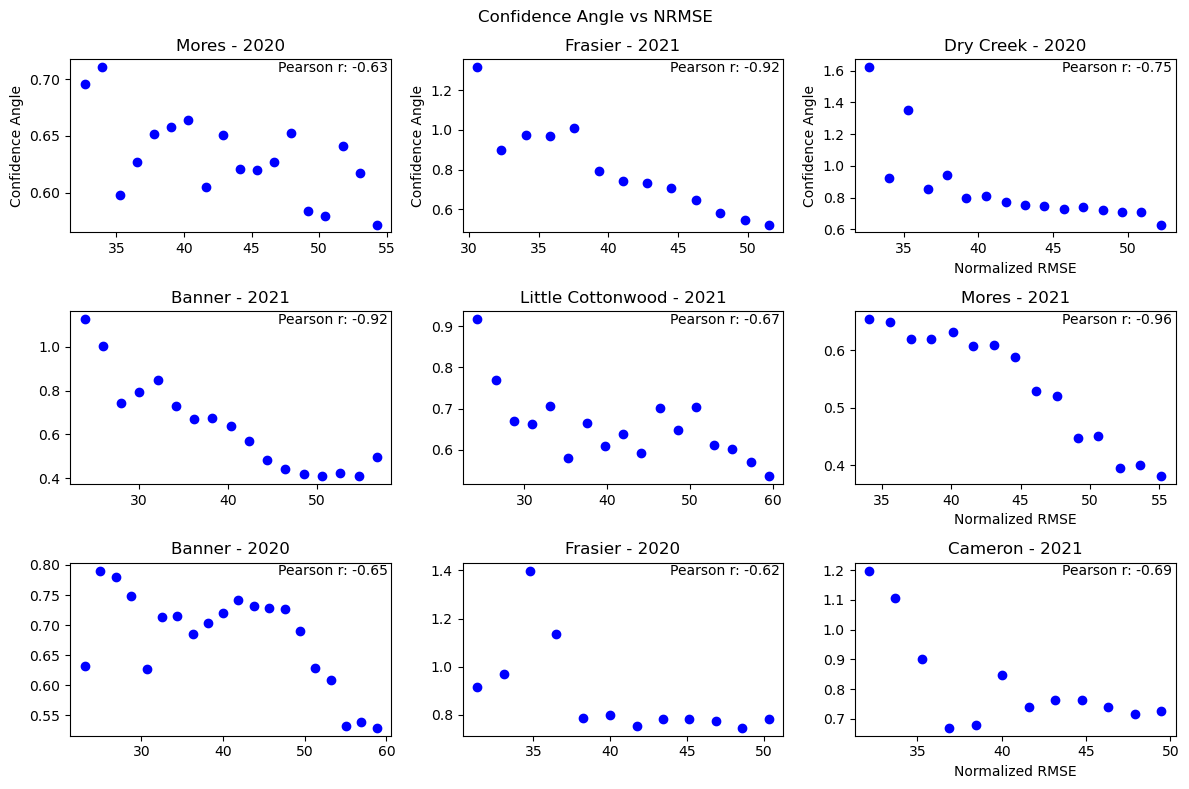

In [233]:
fig, axes = plt.subplots(3, 3, figsize = (12,8))

for ds, ax in zip(dss, axes.ravel()):
    ds_amp = s1_dB_to_power(ds)
    ds['deltaVH_amp'] = ds_amp['s1'].sel(band = 'VH').diff(1)
    ds['deltaVV_amp'] = ds_amp['s1'].sel(band = 'VV').diff(1)

    ds['deltaVH_norm'] = np.abs(ds['deltaVH_amp']) / ds['deltaVH_amp'].mean()
    ds['deltaVV_norm'] = np.abs(ds['deltaVV_amp']) / ds['deltaVV_amp'].mean()

    ds['confidence'] = (ds['deltaVH_norm'].dims, np.angle(ds['deltaVV_norm'].values + ds['deltaVH_norm'].values * 1j))
    ds['confidence'] = ds['confidence'].mean('time')

    if ds.attrs['site'] == 'Frasier' and pd.to_datetime(ds.attrs['lidar-flight-time']).year == 2020:
        time_ds = ds.sel(time = '2020-02-15', method = 'nearest')
    else:
        time_ds = ds.sel(time= ds.attrs['lidar-flight-time'], method ='nearest')
    
    xs = []
    ys = []
    for cat, sub in time_ds.groupby_bins('confidence', np.linspace(ds['confidence'].min(), ds['confidence'].max(), 25)):
        # print(cat)
        x, y = sub['lidar-sd'].values.ravel(), sub['snow_depth'].values.ravel()
        idx = (~np.isnan(x)) & (~np.isnan(y))
        if len(x[idx]) < 10:
            continue
        stat, p = pearsonr(x[idx], y[idx])
        rmse_result = rmse(x[idx], y[idx])
        ax.scatter(np.rad2deg(cat.left), rmse_result / np.nanmean(x), color = 'blue')
        xs.append(cat.left)
        ys.append(rmse_result / np.nanmean(x))
    ax.set_title(f"{ds.attrs['site'].replace('_', ' ')} - {pd.to_datetime(ds.attrs['lidar-flight-time']).year}")
    stat, r = pearsonr(xs, ys)

    ax.text(0.99, 0.99, f'Pearson r: {stat:.2f}',  ha = 'right', va= 'top',transform=ax.transAxes)

for ax in axes[:, -1]:
    ax.set_xlabel('Normalized RMSE')
for ax in axes[0, :]:
    ax.set_ylabel('Confidence Angle')

plt.suptitle('Confidence Angle vs NRMSE')

plt.tight_layout()

figdir= Path('/bsuhome/zacharykeskinen/spicy-analysis/figures/confidence')
plt.savefig(figdir.joinpath('confidence_rmse.png'))

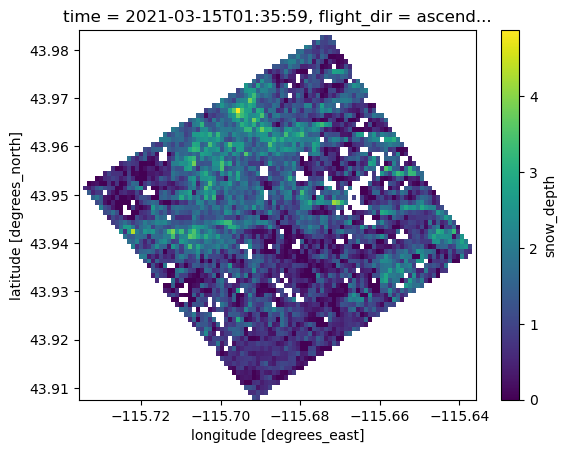

In [183]:
ds['snow_depth'].sel(time = ds.attrs['lidar-flight-time'], method ='nearest').where((~ds['lidar-sd'].isnull())).plot()

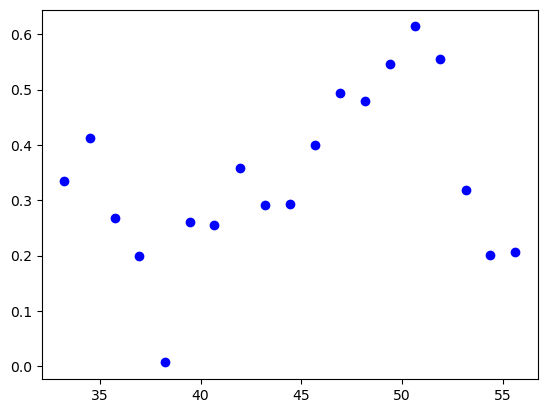

In [177]:
for cat, sub in ds.sel(time = ds.attrs['lidar-flight-time'], method ='nearest').groupby_bins('confidence', np.linspace(ds['confidence'].min(), ds['confidence'].max(), 30)):
    # print(cat)
    x, y = sub['lidar-sd'].values.ravel(), sub['snow_depth'].values.ravel()
    idx = (~np.isnan(x)) & (~np.isnan(y))
    if len(x[idx]) < 10:
        continue
    stat, p = pearsonr(x[idx], y[idx])
    rmse_result = rmse(x[idx], y[idx])
    plt.scatter(np.rad2deg(cat.left), stat, color = 'blue')
# plt.ylim(0, 0.4)

Text(0, 0.5, 'RMSE')

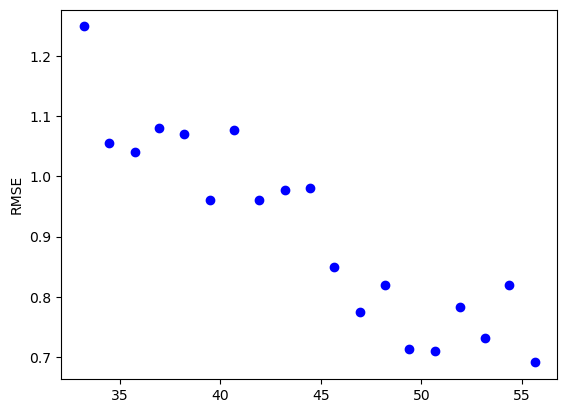

In [178]:
from scipy.stats import pearsonr
for cat, sub in ds.sel(time = ds.attrs['lidar-flight-time'], method ='nearest').groupby_bins('confidence', np.linspace(ds['confidence'].min(), ds['confidence'].max(), 30)):
    # print(cat)
    x, y = sub['lidar-sd'].values.ravel(), sub['snow_depth'].values.ravel()
    idx = (~np.isnan(x)) & (~np.isnan(y))
    if len(x[idx]) < 10:
        continue
    stat, p = pearsonr(x[idx], y[idx])
    rmse_result = rmse(x[idx], y[idx])
    plt.scatter(np.rad2deg(cat.left), rmse_result, color = 'blue')
plt.ylabel('RMSE')
# plt.ylim(0.9, 1.4)

Text(0, 0.5, 'RMSE')

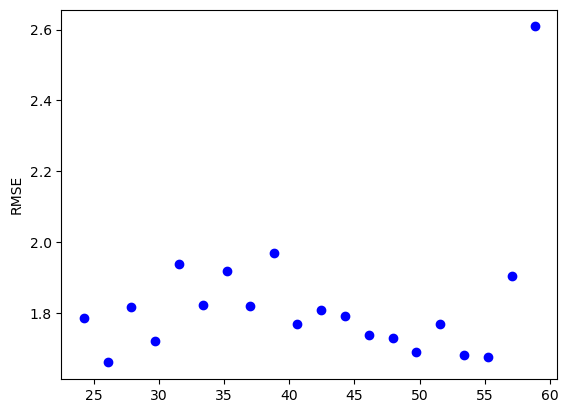

In [171]:
from scipy.stats import pearsonr
for cat, sub in ds.sel(time = ds.attrs['lidar-flight-time'], method ='nearest').groupby_bins('confidence', np.linspace(ds['confidence'].min(), ds['confidence'].max(), 30)):
    # print(cat)
    x, y = sub['lidar-sd'].values.ravel(), sub['snow_depth'].values.ravel()
    idx = (~np.isnan(x)) & (~np.isnan(y))
    if len(x[idx]) < 10:
        continue
    stat, p = pearsonr(x[idx], y[idx])
    rmse_result = rmse(x[idx], y[idx])
    plt.scatter(np.rad2deg(cat.left), np.nanmean(x), color = 'blue')
plt.ylabel('RMSE')